In [41]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.datasets import load_iris, make_classification, make_regression, load_diabetes, load_breast_cancer, load_wine
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.metrics import accuracy_score,  mean_squared_error, r2_score, classification_report, confusion_matrix, roc_auc_score, roc_curve, classification_report
from sklearn.decomposition import PCA
from sklearn.impute import KNNImputer
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectKBest, f_classif

In [2]:
# Train a KNN Classifier on the Iris dataset and print model accuracy.
# Load the Iris dataset
iris = load_iris()
X, y = iris.data, iris.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train the KNN classifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Make predictions
y_pred = knn.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Model Accuracy: {accuracy:.2f}')

Model Accuracy: 1.00


Mean Squared Error: 0.2483


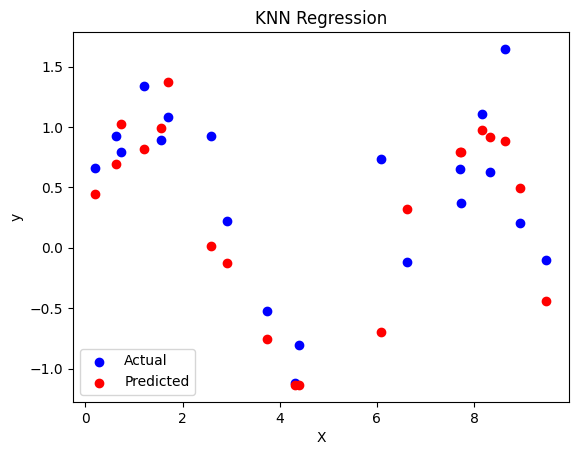

In [4]:
# Train a KNN Regressor on a synthetic dataset and evaluate using Mean Squared Error (MSE).
# Generate synthetic dataset
np.random.seed(42)
X = np.random.rand(100, 1) * 10  # Features in range [0, 10]
y = np.sin(X).ravel() + np.random.normal(0, 0.5, X.shape[0])  # Target with noise

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train KNN Regressor
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train, y_train)

# Make predictions
y_pred = knn.predict(X_test)

# Evaluate using Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse:.4f}")

# Plot results
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.scatter(X_test, y_pred, color='red', label='Predicted')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.title('KNN Regression')
plt.show()

In [5]:
# Train a KNN Classifier using different distance metrics (Euclidean and Manhattan) and compare accuracy.

# Load dataset
iris = load_iris()
X, y = iris.data, iris.target

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train KNN classifiers with different distance metrics
knn_euclidean = KNeighborsClassifier(n_neighbors=5, metric='euclidean')
knn_manhattan = KNeighborsClassifier(n_neighbors=5, metric='manhattan')

knn_euclidean.fit(X_train, y_train)
knn_manhattan.fit(X_train, y_train)

# Predict on test set
y_pred_euclidean = knn_euclidean.predict(X_test)
y_pred_manhattan = knn_manhattan.predict(X_test)

# Compute accuracy
accuracy_euclidean = accuracy_score(y_test, y_pred_euclidean)
accuracy_manhattan = accuracy_score(y_test, y_pred_manhattan)

print(f"Accuracy with Euclidean distance: {accuracy_euclidean:.4f}")
print(f"Accuracy with Manhattan distance: {accuracy_manhattan:.4f}")

Accuracy with Euclidean distance: 1.0000
Accuracy with Manhattan distance: 1.0000


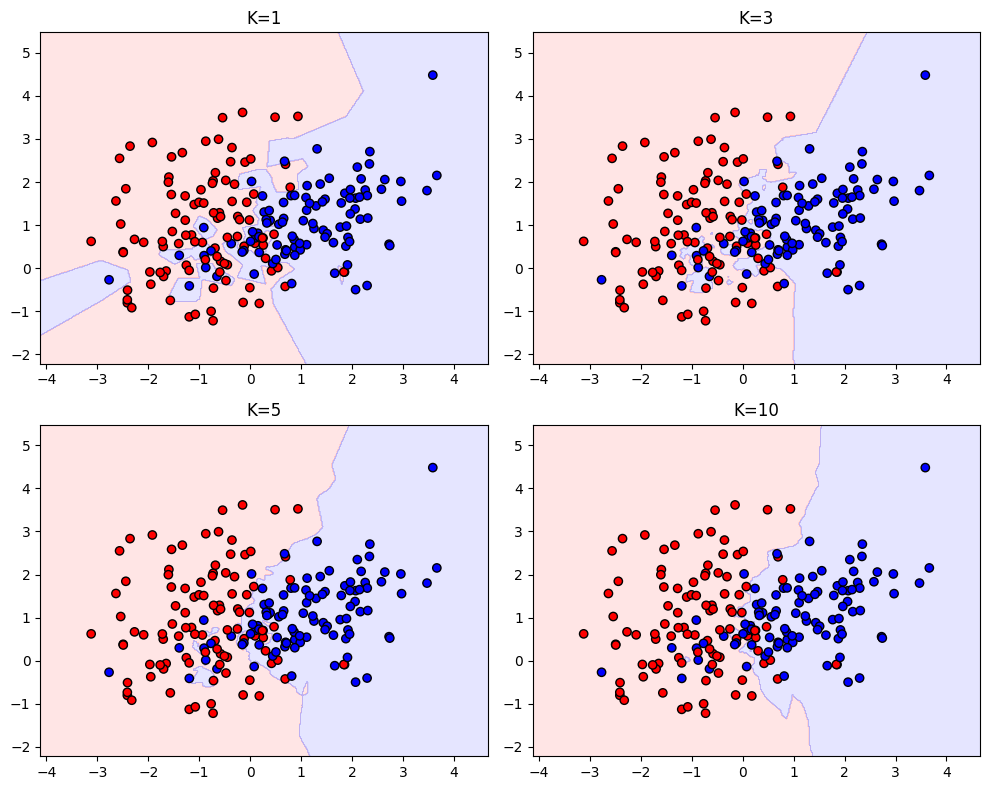

In [7]:
# Train a KNN Classifier with different values of K and visualize decision boundaried.
# Generate synthetic dataset
X, y = make_classification(n_samples=200, n_features=2, n_classes=2, n_clusters_per_class=1, n_redundant=0, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Function to plot decision boundaries
def plot_decision_boundary(X, y, model, ax, title):
    h = 0.02  # Step size in the mesh
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    ax.contourf(xx, yy, Z, alpha=0.3, cmap=ListedColormap(['#FFAAAA', '#AAAAFF']))
    ax.scatter(X[:, 0], X[:, 1], c=y, cmap=ListedColormap(['#FF0000', '#0000FF']), edgecolor='k')
    ax.set_title(title)

# Train KNN models for different values of K
k_values = [1, 3, 5, 10]
fig, axes = plt.subplots(2, 2, figsize=(10, 8))
axes = axes.ravel()

for i, k in enumerate(k_values):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    plot_decision_boundary(X, y, knn, axes[i], f'K={k}')

plt.tight_layout()
plt.show()

In [8]:
# Apply Feature Scaling before training a KNN model and compare results with unscaled data.
# Load dataset (Iris dataset as an example)
iris = load_iris()
X, y = iris.data, iris.target

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train KNN without feature scaling
knn_unscaled = KNeighborsClassifier(n_neighbors=5)
knn_unscaled.fit(X_train, y_train)
y_pred_unscaled = knn_unscaled.predict(X_test)
accuracy_unscaled = accuracy_score(y_test, y_pred_unscaled)
print(f"Accuracy without scaling: {accuracy_unscaled:.4f}")

# Apply feature scaling (Standardization: mean=0, std=1)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train KNN with scaled features
knn_scaled = KNeighborsClassifier(n_neighbors=5)
knn_scaled.fit(X_train_scaled, y_train)
y_pred_scaled = knn_scaled.predict(X_test_scaled)
accuracy_scaled = accuracy_score(y_test, y_pred_scaled)
print(f"Accuracy with scaling: {accuracy_scaled:.4f}")

Accuracy without scaling: 1.0000
Accuracy with scaling: 1.0000


Explained Variance Ratio for each principal component:
Principal Component 1: 0.2901
Principal Component 2: 0.2321
Principal Component 3: 0.1870
Principal Component 4: 0.1543
Principal Component 5: 0.1365


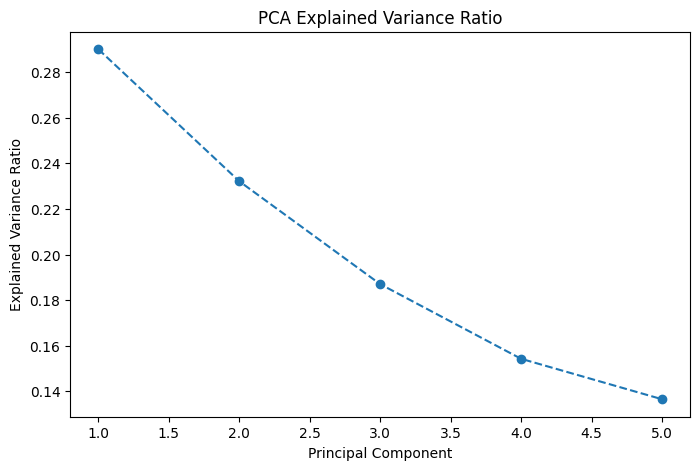

In [10]:
# Train a PCA model on synthetic data and print the explained variance ratio for each component.
# Generate synthetic data
np.random.seed(42)
X = np.random.rand(100, 5)  # 100 samples, 5 features

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA
pca = PCA()
pca.fit(X_scaled)

# Print explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_
print("Explained Variance Ratio for each principal component:")
for i, ratio in enumerate(explained_variance_ratio):
    print(f"Principal Component {i+1}: {ratio:.4f}")

# Plot explained variance ratio
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, marker='o', linestyle='--')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('PCA Explained Variance Ratio')
plt.show()

Accuracy without PCA: 1.0000
Accuracy with PCA: 0.9333


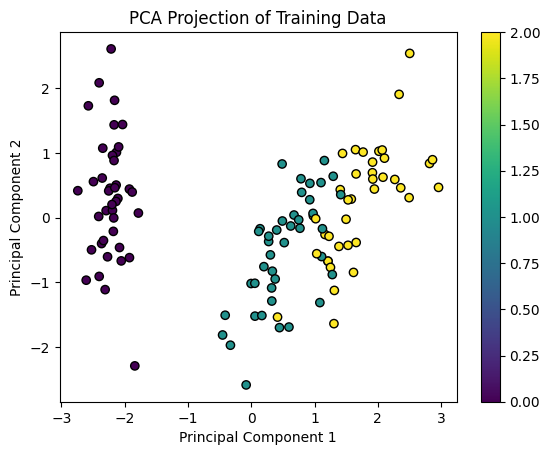

In [11]:
# Apply PCA before training a KNN Classifier and compare accuracy with and without PCA.
# Load dataset
data = load_iris()
X, y = data.data, data.target

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train KNN classifier without PCA
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)
y_pred = knn.predict(X_test_scaled)
accuracy_without_pca = accuracy_score(y_test, y_pred)

# Apply PCA
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Train KNN classifier with PCA-transformed data
knn_pca = KNeighborsClassifier(n_neighbors=5)
knn_pca.fit(X_train_pca, y_train)
y_pred_pca = knn_pca.predict(X_test_pca)
accuracy_with_pca = accuracy_score(y_test, y_pred_pca)

# Print results
print(f'Accuracy without PCA: {accuracy_without_pca:.4f}')
print(f'Accuracy with PCA: {accuracy_with_pca:.4f}')

# Plot PCA components
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, cmap='viridis', edgecolors='k')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Projection of Training Data')
plt.colorbar()
plt.show()

In [13]:
# Perform Hyperparameter Tuning on a KNN Classifier using GridSearchCV.
# Load dataset
iris = load_iris()
X, y = iris.data, iris.target

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define KNN classifier
knn = KNeighborsClassifier()

# Define hyperparameter grid
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],   # Number of neighbors to consider
    'weights': ['uniform', 'distance'],  # Weighting function
    'metric': ['euclidean', 'manhattan', 'minkowski']  # Distance metric
}

# Perform GridSearchCV with 5-fold cross-validation
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Accuracy:", grid_search.best_score_)

# Evaluate on test data
best_knn = grid_search.best_estimator_
y_pred = best_knn.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy:", test_accuracy)

Best Parameters: {'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'uniform'}
Best Cross-Validation Accuracy: 0.9583333333333334
Test Accuracy: 1.0


In [14]:
# Train a KNN Classifier and check the number of misclassified samples.
# Load dataset
iris = load_iris()
X, y = iris.data, iris.target

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train KNN classifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Make predictions
y_pred = knn.predict(X_test)

# Count misclassified samples
misclassified_samples = (y_test != y_pred).sum()

print(f"Number of misclassified samples: {misclassified_samples}")

Number of misclassified samples: 0


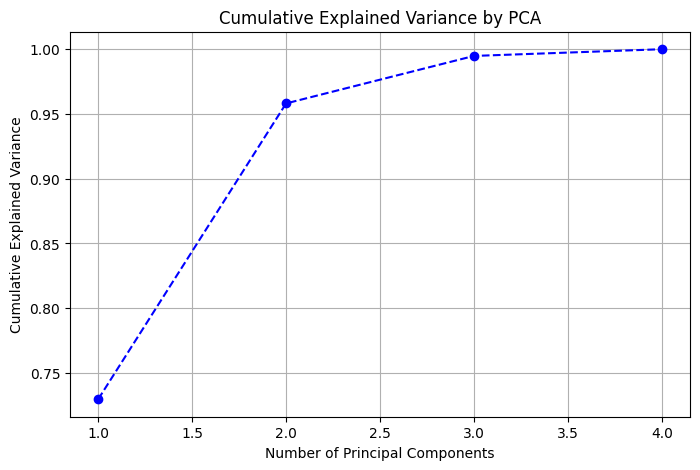

In [15]:
# Train a PCA model and visualize the cumulative explained variance.
# Load dataset
data = load_iris()
X = data.data

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train PCA model
pca = PCA()
pca.fit(X_scaled)

# Explained variance
explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

# Plot cumulative explained variance
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='--', color='b')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance by PCA')
plt.grid(True)
plt.show()

In [16]:
# Train a KNN Classifier using different values of the weights parameter (uniform vs. distance) and compare accuracy.
# Load dataset
iris = load_iris()
X, y = iris.data, iris.target

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train KNN classifier with uniform weights
knn_uniform = KNeighborsClassifier(n_neighbors=5, weights='uniform')
knn_uniform.fit(X_train, y_train)

# Train KNN classifier with distance-based weights
knn_distance = KNeighborsClassifier(n_neighbors=5, weights='distance')
knn_distance.fit(X_train, y_train)

# Predict on test data
y_pred_uniform = knn_uniform.predict(X_test)
y_pred_distance = knn_distance.predict(X_test)

# Compute accuracy
accuracy_uniform = accuracy_score(y_test, y_pred_uniform)
accuracy_distance = accuracy_score(y_test, y_pred_distance)

print(f"Accuracy with uniform weights: {accuracy_uniform:.4f}")
print(f"Accuracy with distance-based weights: {accuracy_distance:.4f}")

Accuracy with uniform weights: 1.0000
Accuracy with distance-based weights: 1.0000


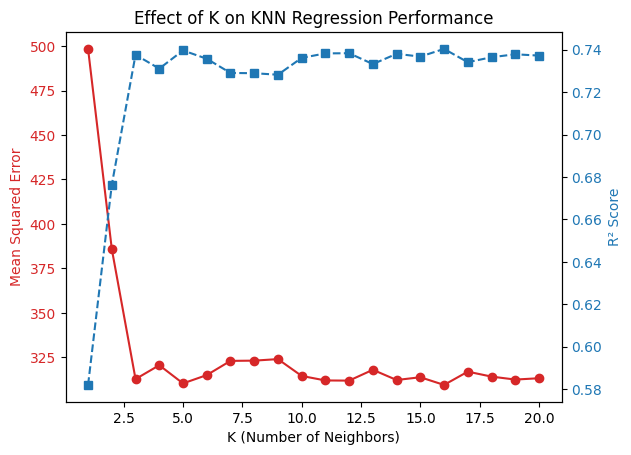

In [20]:
# Train a KNN Regressor and analyze the effect of different K values on performance.
# Generate a synthetic regression dataset
X, y = make_regression(n_samples=300, n_features=1, noise=15, random_state=42)

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Experiment with different values of K
k_values = range(1, 21)
mse_scores = []
r2_scores = []

for k in k_values:
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    y_pred = knn.predict(X_test_scaled)

    mse_scores.append(mean_squared_error(y_test, y_pred))
    r2_scores.append(r2_score(y_test, y_pred))

# Plot MSE and R² score vs K values
fig, ax1 = plt.subplots()

ax1.set_xlabel("K (Number of Neighbors)")
ax1.set_ylabel("Mean Squared Error", color="tab:red")
ax1.plot(k_values, mse_scores, marker="o", linestyle="-", color="tab:red", label="MSE")
ax1.tick_params(axis="y", labelcolor="tab:red")

ax2 = ax1.twinx()
ax2.set_ylabel("R² Score", color="tab:blue")
ax2.plot(k_values, r2_scores, marker="s", linestyle="--", color="tab:blue", label="R² Score")
ax2.tick_params(axis="y", labelcolor="tab:blue")

plt.title("Effect of K on KNN Regression Performance")
plt.show()

Missing values before KNN Imputation:
 age    47
sex    46
bmi    46
bp     40
s1     43
s2     40
s3     52
s4     54
s5     54
s6     55
dtype: int64

Missing values after KNN Imputation:
 age    0
sex    0
bmi    0
bp     0
s1     0
s2     0
s3     0
s4     0
s5     0
s6     0
dtype: int64


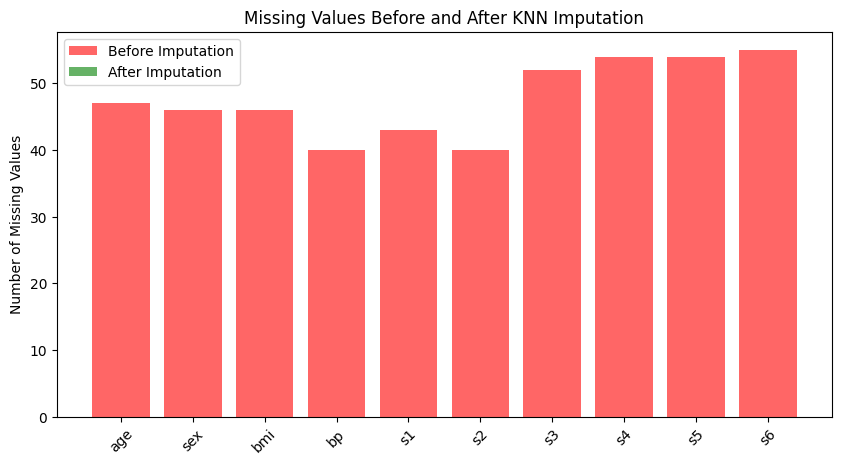

In [22]:
# Implement KNN Imputation for handling missing values in a dataset.
# Load a dataset (using diabetes dataset for example)
data = load_diabetes()
df = pd.DataFrame(data.data, columns=data.feature_names)

# Introduce missing values randomly
np.random.seed(42)
missing_rate = 0.1  # 10% missing values
mask = np.random.rand(*df.shape) < missing_rate
df_missing = df.copy()
df_missing[mask] = np.nan

# Display missing values before imputation
print("Missing values before KNN Imputation:\n", df_missing.isnull().sum())

# Apply KNN Imputation
knn_imputer = KNNImputer(n_neighbors=5)
df_imputed = pd.DataFrame(knn_imputer.fit_transform(df_missing), columns=df.columns)

# Display missing values after imputation
print("\nMissing values after KNN Imputation:\n", df_imputed.isnull().sum())

# Visualization: Compare before and after imputation
missing_before = df_missing.isnull().sum()
missing_after = df_imputed.isnull().sum()

plt.figure(figsize=(10, 5))
plt.bar(df.columns, missing_before, color='red', alpha=0.6, label="Before Imputation")
plt.bar(df.columns, missing_after, color='green', alpha=0.6, label="After Imputation")
plt.xticks(rotation=45)
plt.ylabel("Number of Missing Values")
plt.title("Missing Values Before and After KNN Imputation")
plt.legend()
plt.show()

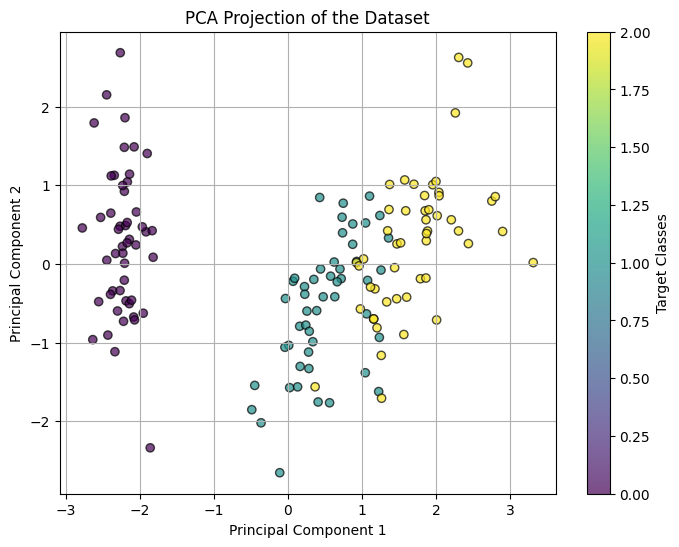

In [23]:
# Train a PCA model and visualize the data projection onto the first two principal components.
# Load dataset (Iris for example)
data = load_iris()
X = data.data  # Features
y = data.target  # Labels

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Scatter plot of the first two principal components
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis', edgecolor='k', alpha=0.7)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Projection of the Dataset')
plt.colorbar(label='Target Classes')
plt.grid(True)
plt.show()

In [24]:
# Train a KNN Classifier using the KD Tree and Ball Tree algorithms and compare performance.
import time
# Load dataset
data = load_iris()
X, y = data.data, data.target

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Function to train and evaluate KNN with a given algorithm
def evaluate_knn(algorithm):
    knn = KNeighborsClassifier(n_neighbors=5, algorithm=algorithm)
    start_time = time.time()
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    end_time = time.time()
    accuracy = accuracy_score(y_test, y_pred)
    runtime = end_time - start_time
    return accuracy, runtime

# Evaluate KNN with KD Tree
kd_tree_accuracy, kd_tree_time = evaluate_knn('kd_tree')

# Evaluate KNN with Ball Tree
ball_tree_accuracy, ball_tree_time = evaluate_knn('ball_tree')

# Print results
print(f"KD Tree Accuracy: {kd_tree_accuracy:.4f}, Time: {kd_tree_time:.6f} sec")
print(f"Ball Tree Accuracy: {ball_tree_accuracy:.4f}, Time: {ball_tree_time:.6f} sec")

KD Tree Accuracy: 1.0000, Time: 0.006560 sec
Ball Tree Accuracy: 1.0000, Time: 0.006713 sec


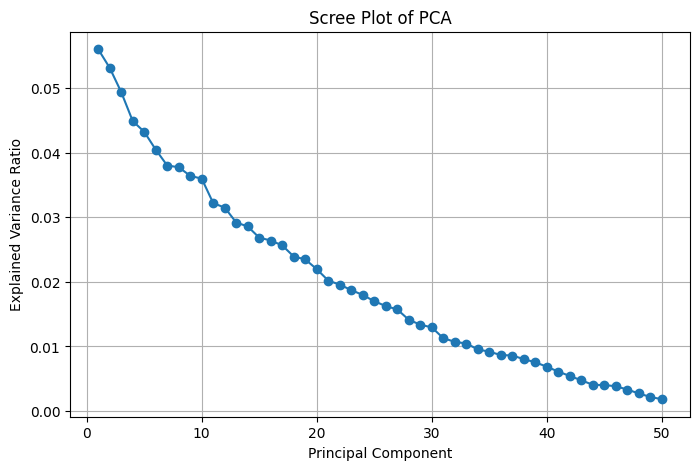

In [25]:
# Train a PCA model on a high-dimensional dataset and visualize the Scree plot.
# Generate a high-dimensional dataset (100 samples, 50 features)
np.random.seed(42)
X = np.random.rand(100, 50)

# Standardize the dataset
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA
pca = PCA()
pca.fit(X_scaled)

# Explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_

# Scree plot
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, marker='o', linestyle='-')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Scree Plot of PCA')
plt.grid()
plt.show()

In [27]:
# Train a KNN Classifier and evaluate performance using Precision, Recall, and F1-Score.
# Load dataset (using Iris dataset as an example)
from sklearn.datasets import load_iris
iris = load_iris()
X, y = iris.data, iris.target

# Split into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize features for better KNN performance
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train KNN classifier
k = 5  # Choose the number of neighbors
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train, y_train)

# Make predictions
y_pred = knn.predict(X_test)

# Evaluate performance
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



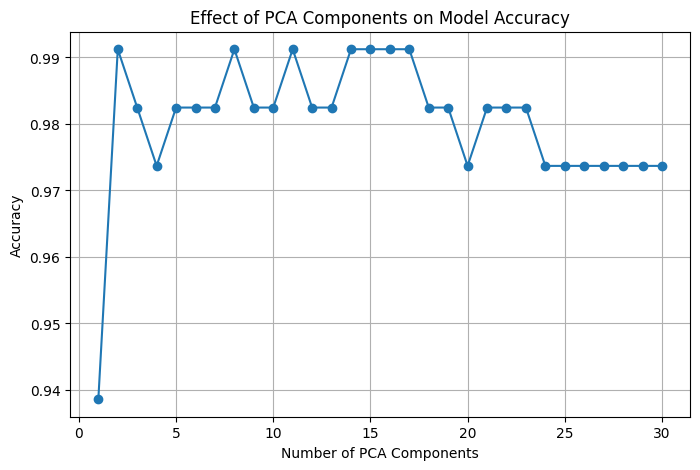

In [29]:
# Train a PCA model and analyze the effect of different numbers of components on accuracy.
# Load dataset
data = load_breast_cancer()
X, y = data.data, data.target

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Try different numbers of PCA components and record accuracy
components_range = range(1, X.shape[1] + 1)
accuracies = []

for n in components_range:
    # Apply PCA
    pca = PCA(n_components=n)
    X_train_pca = pca.fit_transform(X_train)
    X_test_pca = pca.transform(X_test)

    # Train Logistic Regression model
    model = LogisticRegression(max_iter=1000, random_state=42)
    model.fit(X_train_pca, y_train)

    # Predict and compute accuracy
    y_pred = model.predict(X_test_pca)
    acc = accuracy_score(y_test, y_pred)
    accuracies.append(acc)

# Plot results
plt.figure(figsize=(8, 5))
plt.plot(components_range, accuracies, marker='o', linestyle='-')
plt.xlabel('Number of PCA Components')
plt.ylabel('Accuracy')
plt.title('Effect of PCA Components on Model Accuracy')
plt.grid(True)
plt.show()

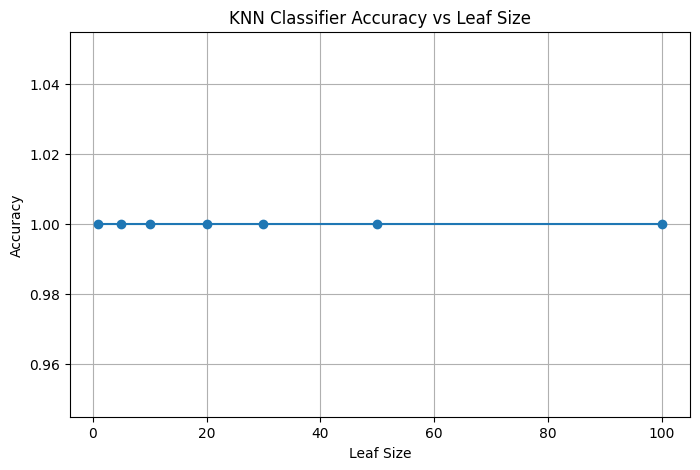

Leaf Size: 1, Accuracy: 1.0000
Leaf Size: 5, Accuracy: 1.0000
Leaf Size: 10, Accuracy: 1.0000
Leaf Size: 20, Accuracy: 1.0000
Leaf Size: 30, Accuracy: 1.0000
Leaf Size: 50, Accuracy: 1.0000
Leaf Size: 100, Accuracy: 1.0000


In [30]:
# Train a KNN Classifier with different leaf_size values and compare accuracy.
# Load the dataset
iris = load_iris()
X, y = iris.data, iris.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Different leaf_size values to test
leaf_sizes = [1, 5, 10, 20, 30, 50, 100]
accuracies = []

# Train KNN with different leaf_size values and record accuracy
for leaf_size in leaf_sizes:
    knn = KNeighborsClassifier(n_neighbors=5, leaf_size=leaf_size)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    accuracies.append(acc)

# Plot the results
plt.figure(figsize=(8, 5))
plt.plot(leaf_sizes, accuracies, marker='o', linestyle='-')
plt.xlabel("Leaf Size")
plt.ylabel("Accuracy")
plt.title("KNN Classifier Accuracy vs Leaf Size")
plt.grid(True)
plt.show()

# Print accuracy values for each leaf_size
for ls, acc in zip(leaf_sizes, accuracies):
    print(f"Leaf Size: {ls}, Accuracy: {acc:.4f}")

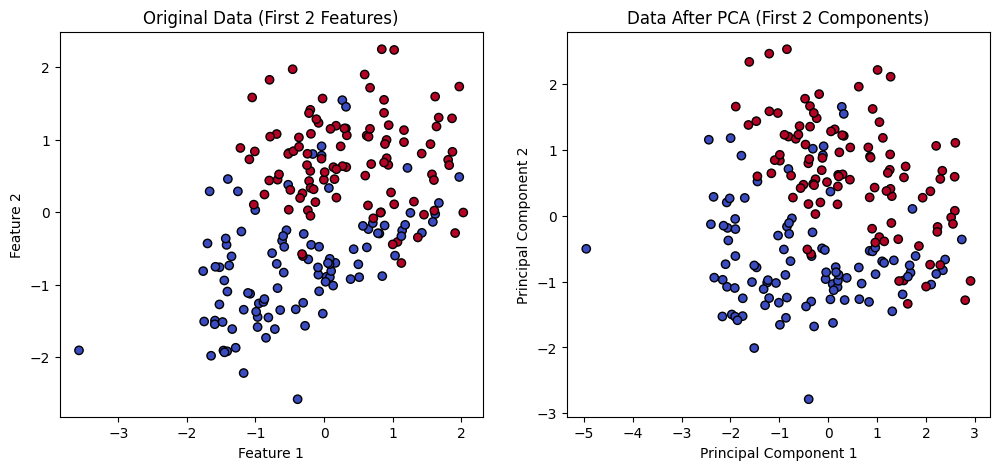

In [33]:
# Train a PCA model and visualize how data points are transformed before and after PCA.
# Step 1: Generate a sample dataset
X, y = make_classification(n_samples=200, n_features=4, n_informative=2, n_redundant=1, n_repeated=0, random_state=42)

# Step 2: Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 3: Apply PCA (reduce to 2D for visualization)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Step 4: Visualization
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

# Plot original data (using first two features for visualization)
ax[0].scatter(X_scaled[:, 0], X_scaled[:, 1], c=y, cmap='coolwarm', edgecolors='k')
ax[0].set_title("Original Data (First 2 Features)")
ax[0].set_xlabel("Feature 1")
ax[0].set_ylabel("Feature 2")

# Plot transformed data
ax[1].scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='coolwarm', edgecolors='k')
ax[1].set_title("Data After PCA (First 2 Components)")
ax[1].set_xlabel("Principal Component 1")
ax[1].set_ylabel("Principal Component 2")

plt.show()

In [36]:
#  Train a KNN Classifier on a real-world dataset (Wine dataset) and print classification report.
# Load the Wine dataset
wine = load_wine()
X, y = wine.data, wine.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train a KNN classifier
knn = KNeighborsClassifier(n_neighbors=5)  # Choosing k=5
knn.fit(X_train, y_train)

# Make predictions
y_pred = knn.predict(X_test)

# Print classification report
print(classification_report(y_test, y_pred, target_names=wine.target_names))

              precision    recall  f1-score   support

     class_0       0.93      1.00      0.97        14
     class_1       1.00      0.86      0.92        14
     class_2       0.89      1.00      0.94         8

    accuracy                           0.94        36
   macro avg       0.94      0.95      0.94        36
weighted avg       0.95      0.94      0.94        36



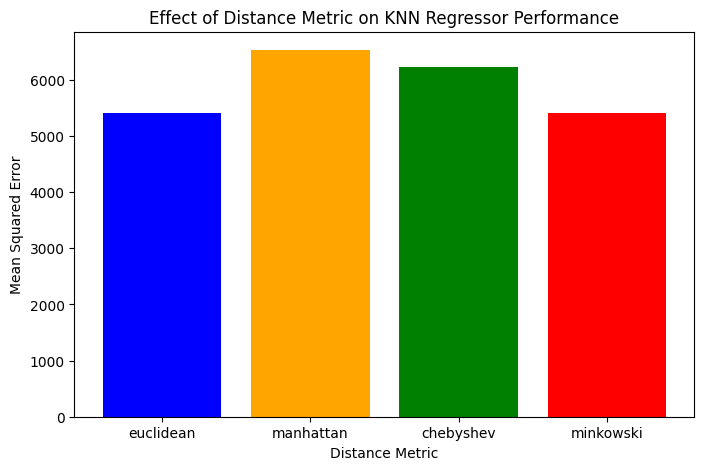

Mean Squared Error for different metrics:
euclidean: 5421.43
manhattan: 6534.35
chebyshev: 6231.96
minkowski: 5421.43


In [37]:
# Train a KNN Regressor and analyze the effect of different distance metrics on prediction error.
# Generate synthetic regression dataset
X, y = make_regression(n_samples=1000, n_features=8, noise=0.1, random_state=42)

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define distance metrics
metrics = ['euclidean', 'manhattan', 'chebyshev', 'minkowski']

# Train and evaluate KNN regressors with different distance metrics
mse_scores = {}
for metric in metrics:
    knn = KNeighborsRegressor(n_neighbors=5, metric=metric)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    mse_scores[metric] = mean_squared_error(y_test, y_pred)

# Plot results
plt.figure(figsize=(8, 5))
plt.bar(mse_scores.keys(), mse_scores.values(), color=['blue', 'orange', 'green', 'red'])
plt.xlabel('Distance Metric')
plt.ylabel('Mean Squared Error')
plt.title('Effect of Distance Metric on KNN Regressor Performance')
plt.show()

# Print MSE scores
print("Mean Squared Error for different metrics:")
for metric, mse in mse_scores.items():
    print(f"{metric}: {mse:.2f}")


ROC-AUC Score: 0.8523


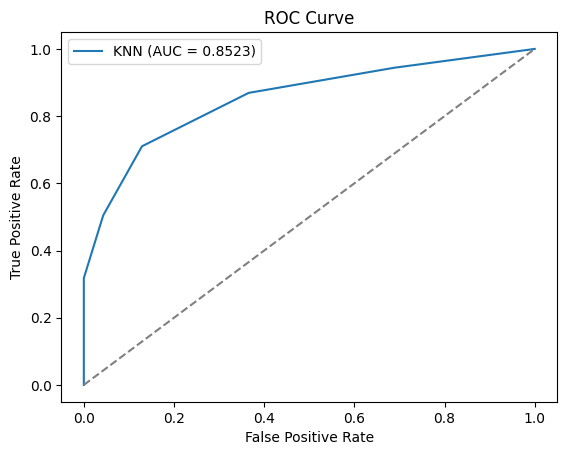

In [39]:
# Train a KNN Classifier and evaluate using ROC-AUC score.
# Generate synthetic dataset
X, y = make_classification(n_samples=1000, n_features=20, random_state=42)

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train KNN classifier
knn = KNeighborsClassifier(n_neighbors=5)  # Using k=5
knn.fit(X_train, y_train)

# Predict probabilities
y_probs = knn.predict_proba(X_test)[:, 1]

# Compute ROC-AUC score
roc_auc = roc_auc_score(y_test, y_probs)
print(f"ROC-AUC Score: {roc_auc:.4f}")

# Plot ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_probs)
plt.plot(fpr, tpr, label=f'KNN (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

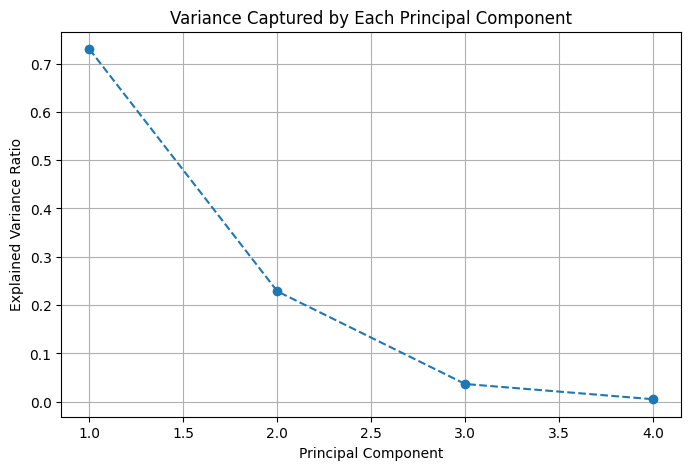

In [40]:
# Train a PCA model and visualize the variance captured by each principal component.
# Load dataset
iris = load_iris()
X = iris.data  # Features

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Plot explained variance ratio
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_, marker='o', linestyle='--')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Variance Captured by Each Principal Component')
plt.grid()
plt.show()

In [42]:
#Train a KNN Classifier and perform feature selection before training.
# Load dataset (Example: Iris dataset)
from sklearn.datasets import load_iris
data = load_iris()
X, y = data.data, data.target

# Feature Selection: Select top 2 best features
selector = SelectKBest(score_func=f_classif, k=2)
X_selected = selector.fit_transform(X, y)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train KNN Classifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Predictions
y_pred = knn.predict(X_test)

# Evaluate model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



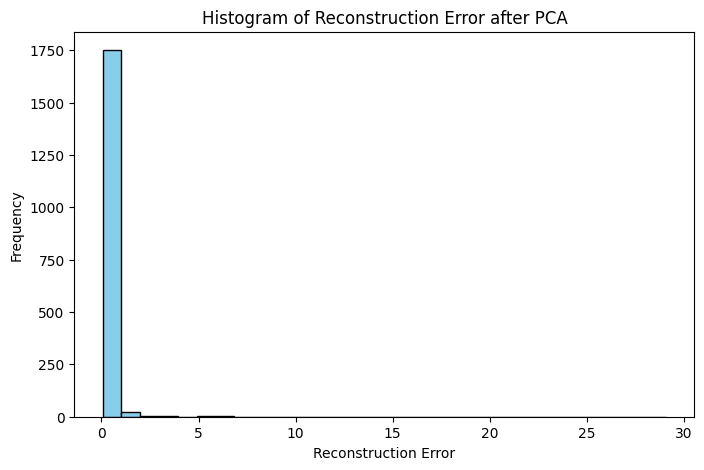

In [43]:
# Train a PCA model and visualize the data reconstruction error after reducing dimensions.
from sklearn.datasets import load_digits

# Load dataset
digits = load_digits()
X = digits.data  # Original data

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA with reduced dimensions (e.g., 10 components)
pca = PCA(n_components=10)
X_pca = pca.fit_transform(X_scaled)

# Reconstruct the data from reduced components
X_reconstructed = pca.inverse_transform(X_pca)

# Compute reconstruction error (Mean Squared Error per sample)
reconstruction_error = np.mean((X_scaled - X_reconstructed) ** 2, axis=1)

# Visualize reconstruction error
plt.figure(figsize=(8, 5))
plt.hist(reconstruction_error, bins=30, color='skyblue', edgecolor='black')
plt.xlabel('Reconstruction Error')
plt.ylabel('Frequency')
plt.title('Histogram of Reconstruction Error after PCA')
plt.show()

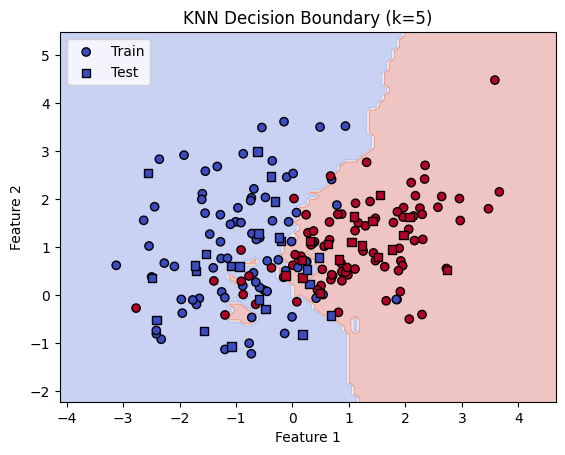

In [45]:
# Train a KNN Classifier and visualize the decision boundary.
# Generate synthetic data
X, y = make_classification(n_samples=200, n_features=2, n_informative=2, n_redundant=0, n_repeated=0, n_classes=2, n_clusters_per_class=1, random_state=42)

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a KNN classifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Create a mesh grid for visualization
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))

# Predict the class for each point in the mesh
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot decision boundary
plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, marker='o', edgecolors='k', cmap=plt.cm.coolwarm, label="Train")
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, marker='s', edgecolors='k', cmap=plt.cm.coolwarm, label="Test")
plt.legend()
plt.title("KNN Decision Boundary (k=5)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

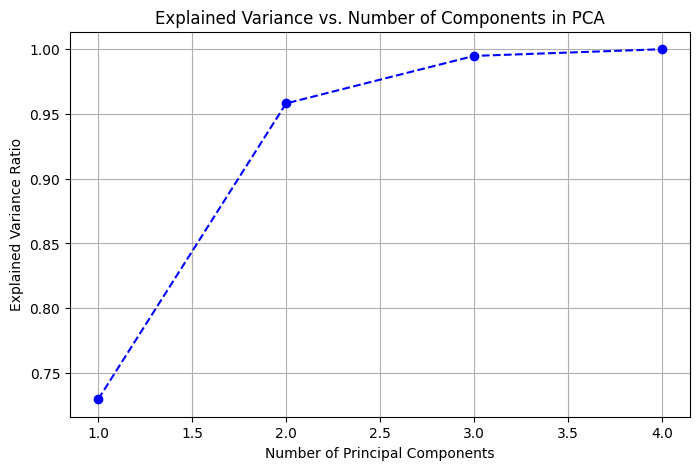

In [46]:
# Train a PCA model and analyze the effect of different numbers of components on data variance
# Load the dataset
data = load_iris()
X = data.data  # Features

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA with different numbers of components
n_components = X.shape[1]  # Maximum possible components
explained_variance_ratios = []

for i in range(1, n_components + 1):
    pca = PCA(n_components=i)
    pca.fit(X_scaled)
    explained_variance_ratios.append(np.sum(pca.explained_variance_ratio_))

# Plot explained variance vs. number of components
plt.figure(figsize=(8, 5))
plt.plot(range(1, n_components + 1), explained_variance_ratios, marker='o', linestyle='--', color='b')
plt.xlabel("Number of Principal Components")
plt.ylabel("Explained Variance Ratio")
plt.title("Explained Variance vs. Number of Components in PCA")
plt.grid()
plt.show()